In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.airlinequality.com'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')


print(soup.get_text())











Airline Reviews and Rating | SKYTRAX


















Airline Reviews and Rating | SKYTRAX

































 




















                                Air Travel Ratings & Reviews | Airline Rating and Reviews | Airport Rating and Reviews | Seat Reviews                            












Log In
Join




Menu








Airline Reviews



Airline Reviews

Latest Airline Reviews

A-Z Airline Reviews

Airline Review Scores

A-Z Airline Photos

Airline Lounges

Latest Lounge Reviews

A-Z Airline Lounge Reviews

Lounge Photo Galleries

Airline Lounge Scores

A-Z Lounge Photos





Airline Seats

Latest Seat Reviews

A-Z Airline Seat Reviews

Airline Seat Scores

A-Z Seat Photos




Airport Reviews



Airport Reviews

Latest Airport Reviews

A-Z Airport Reviews

Airport Review Scores

A-Z Airport Photos




Write A Review

Airport & Airline Rating



Airline Rating

A-Z Airline Ratings

5-Star Airlines





Airport Rating

A-Z Airport Ratings

5-Star Ai

In [6]:
url1='https://www.airlinequality.com/airline-reviews/british-airways'
response1=requests.get(url1)
soup1=BeautifulSoup(response1.content, 'html.parser')
print(soup1.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
   <!-- icons & favicons -->
   <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-

In [12]:
pages=37

page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"On page{i}")

    url = f"{url1}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

On page1
   ---> 100 total reviews
On page2
   ---> 200 total reviews
On page3
   ---> 300 total reviews
On page4
   ---> 400 total reviews
On page5
   ---> 500 total reviews
On page6
   ---> 600 total reviews
On page7
   ---> 700 total reviews
On page8
   ---> 800 total reviews
On page9
   ---> 900 total reviews
On page10
   ---> 1000 total reviews
On page11
   ---> 1100 total reviews
On page12
   ---> 1200 total reviews
On page13
   ---> 1300 total reviews
On page14
   ---> 1400 total reviews
On page15
   ---> 1500 total reviews
On page16
   ---> 1600 total reviews
On page17
   ---> 1700 total reviews
On page18
   ---> 1800 total reviews
On page19
   ---> 1900 total reviews
On page20
   ---> 2000 total reviews
On page21
   ---> 2100 total reviews
On page22
   ---> 2200 total reviews
On page23
   ---> 2300 total reviews
On page24
   ---> 2400 total reviews
On page25
   ---> 2500 total reviews
On page26
   ---> 2600 total reviews
On page27
   ---> 2700 total reviews
On page28
   ---> 2

In [13]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The airplanes and the lounge...
1,✅ Trip Verified | One of the worst experiences...
2,✅ Trip Verified | Cancelled our flight last-m...
3,"✅ Trip Verified | I had a flight from Miami, F..."
4,✅ Trip Verified | We started our day with BA ...


In [14]:
df.tail()

,reviews
3655,Flight from Heathrow to Toronto. Booked emerge...
3656,LHR to HAM. Purser addresses all club passenge...
3657,My son who had worked for British Airways urge...
3658,London City-New York JFK via Shannon on A318 b...
3659,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [15]:
df.to_csv('Data.csv')

In [16]:
data=pd.read_csv('Data.csv')

In [17]:
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | The airplanes and the lounge...
1,1,✅ Trip Verified | One of the worst experiences...
2,2,✅ Trip Verified | Cancelled our flight last-m...
3,3,"✅ Trip Verified | I had a flight from Miami, F..."
4,4,✅ Trip Verified | We started our day with BA ...


In [20]:
data.reset_index(drop=True,inplace=True)
print(data)

      Unnamed: 0                                            reviews
0              0  ✅ Trip Verified | The airplanes and the lounge...
1              1  ✅ Trip Verified | One of the worst experiences...
2              2  ✅ Trip Verified |  Cancelled our flight last-m...
3              3  ✅ Trip Verified | I had a flight from Miami, F...
4              4  ✅ Trip Verified |  We started our day with BA ...
...          ...                                                ...
3655        3655  Flight from Heathrow to Toronto. Booked emerge...
3656        3656  LHR to HAM. Purser addresses all club passenge...
3657        3657  My son who had worked for British Airways urge...
3658        3658  London City-New York JFK via Shannon on A318 b...
3659        3659  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3660 rows x 2 columns]


In [23]:
data['Verified'] = data['reviews'].apply(lambda x: '✅ Trip Verified |' if '✅ Trip Verified |' in x else 'Not Verified |')


In [28]:
data['reviews'] = data['reviews'].apply(lambda x: x.replace('✅ Trip Verified |', '').replace('Not Verified |', '').strip())

In [29]:
data.drop('Unnamed: 0',axis=1)

,reviews,Verified
0,"The airplanes and the lounges are worn out, ol...",✅ Trip Verified |
1,One of the worst experiences on the worst airl...,✅ Trip Verified |
2,Cancelled our flight last-minute then moved us...,✅ Trip Verified |
3,"I had a flight from Miami, Florida to Dublin, ...",✅ Trip Verified |
4,We started our day with BA in Prague. The flig...,✅ Trip Verified |
...,...,...
3655,Flight from Heathrow to Toronto. Booked emerge...,Not Verified |
3656,LHR to HAM. Purser addresses all club passenge...,Not Verified |
3657,My son who had worked for British Airways urge...,Not Verified |
3658,London City-New York JFK via Shannon on A318 b...,Not Verified |


In [30]:
data['reviews']=data['reviews'].str.lower()

In [31]:
data.head()

,Unnamed: 0,reviews,Verified
0,0,"the airplanes and the lounges are worn out, ol...",✅ Trip Verified |
1,1,one of the worst experiences on the worst airl...,✅ Trip Verified |
2,2,cancelled our flight last-minute then moved us...,✅ Trip Verified |
3,3,"i had a flight from miami, florida to dublin, ...",✅ Trip Verified |
4,4,we started our day with ba in prague. the flig...,✅ Trip Verified |


In [32]:
import string

def remove_punctuations(text):
   
    translator = str.maketrans('', '', string.punctuation)
    
    return text.translate(translator)


data['reviews'] = data['reviews'].apply(remove_punctuations)


print(data)

      Unnamed: 0                                            reviews  \
0              0  the airplanes and the lounges are worn out old...   
1              1  one of the worst experiences on the worst airl...   
2              2  cancelled our flight lastminute then moved us ...   
3              3  i had a flight from miami florida to dublin ir...   
4              4  we started our day with ba in prague the fligh...   
...          ...                                                ...   
3655        3655  flight from heathrow to toronto booked emergen...   
3656        3656  lhr to ham purser addresses all club passenger...   
3657        3657  my son who had worked for british airways urge...   
3658        3658  london citynew york jfk via shannon on a318 bu...   
3659        3659  sinlhr ba12 b747436 first class old aircraft 1...   

               Verified  
0     ✅ Trip Verified |  
1     ✅ Trip Verified |  
2     ✅ Trip Verified |  
3     ✅ Trip Verified |  
4     ✅ Trip Veri

In [37]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    
    tokens = word_tokenize(text)
    return tokens

data['tokenized_review'] = data['reviews'].apply(tokenize_text)

In [41]:
data.head()

,Unnamed: 0,reviews,Verified,tokenized_review,filtered_review
0,0,the airplanes and the lounges are worn out old...,✅ Trip Verified |,"[the, airplanes, and, the, lounges, are, worn,...","[airplanes, lounges, worn, old, broken, dallas..."
1,1,one of the worst experiences on the worst airl...,✅ Trip Verified |,"[one, of, the, worst, experiences, on, the, wo...","[one, worst, experiences, worst, airline, flig..."
2,2,cancelled our flight lastminute then moved us ...,✅ Trip Verified |,"[cancelled, our, flight, lastminute, then, mov...","[cancelled, flight, lastminute, moved, us, ont..."
3,3,i had a flight from miami florida to dublin ir...,✅ Trip Verified |,"[i, had, a, flight, from, miami, florida, to, ...","[flight, miami, florida, dublin, ireland, via,..."
4,4,we started our day with ba in prague the fligh...,✅ Trip Verified |,"[we, started, our, day, with, ba, in, prague, ...","[started, day, ba, prague, flight, actually, l..."


In [40]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens


data['filtered_review'] = data['tokenized_review'].apply(remove_stopwords)

print(data[['tokenized_review', 'filtered_review']])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sachin/nltk_data...


                                       tokenized_review  \
0     [the, airplanes, and, the, lounges, are, worn,...   
1     [one, of, the, worst, experiences, on, the, wo...   
2     [cancelled, our, flight, lastminute, then, mov...   
3     [i, had, a, flight, from, miami, florida, to, ...   
4     [we, started, our, day, with, ba, in, prague, ...   
...                                                 ...   
3655  [flight, from, heathrow, to, toronto, booked, ...   
3656  [lhr, to, ham, purser, addresses, all, club, p...   
3657  [my, son, who, had, worked, for, british, airw...   
3658  [london, citynew, york, jfk, via, shannon, on,...   
3659  [sinlhr, ba12, b747436, first, class, old, air...   

                                        filtered_review  
0     [airplanes, lounges, worn, old, broken, dallas...  
1     [one, worst, experiences, worst, airline, flig...  
2     [cancelled, flight, lastminute, moved, us, ont...  
3     [flight, miami, florida, dublin, ireland, via,...  
4

[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
from textblob import TextBlob

def analyze_sentiment(tokens):
    
    sentence = ' '.join(tokens)
    
    blob = TextBlob(sentence)
    
    polarity = blob.sentiment.polarity
    
    
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


data['sentiment'] = data['filtered_review'].apply(analyze_sentiment)


print(data[['filtered_review', 'sentiment']])


                                        filtered_review sentiment
0     [airplanes, lounges, worn, old, broken, dallas...  negative
1     [one, worst, experiences, worst, airline, flig...  negative
2     [cancelled, flight, lastminute, moved, us, ont...  positive
3     [flight, miami, florida, dublin, ireland, via,...  negative
4     [started, day, ba, prague, flight, actually, l...  negative
...                                                 ...       ...
3655  [flight, heathrow, toronto, booked, emergency,...  positive
3656  [lhr, ham, purser, addresses, club, passengers...  positive
3657  [son, worked, british, airways, urged, fly, br...  positive
3658  [london, citynew, york, jfk, via, shannon, a31...  positive
3659  [sinlhr, ba12, b747436, first, class, old, air...  negative

[3660 rows x 2 columns]


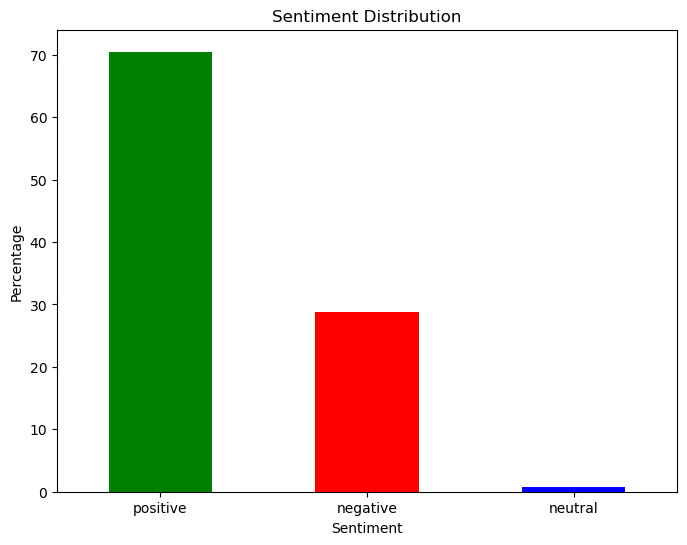

positive    70.491803
negative    28.825137
neutral      0.683060
Name: sentiment, dtype: float64


In [45]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

print(sentiment_counts)

